<a href="https://colab.research.google.com/github/tr3nt-tayl0r/CIMIS/blob/main/colabs/graphs/delta_ETo_monthly_avg_jun_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tr3nt-tayl0r/CIMIS.git

Cloning into 'CIMIS'...
remote: Enumerating objects: 10914, done.
remote: Counting objects: 100% (453/453), done.
remote: Compressing objects: 100% (419/419), done.
remote: Total 10914 (delta 61), reused 394 (delta 34), pack-reused 10461 (from 1)
Receiving objects: 100% (10914/10914), 663.00 MiB | 10.17 MiB/s, done.
Resolving deltas: 100% (2240/2240), done.
Updating files: 100% (4038/4038), done.


In [2]:
import glob
import os
import sys
import datetime
import numpy as np
import pandas as pd
import json
import requests
import datetime
import matplotlib.pyplot as plt
from google.colab import userdata
!pip install cartopy
import cartopy
import geopandas as gpd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 79.2 MB/s eta 0:00:00


(102, 59)


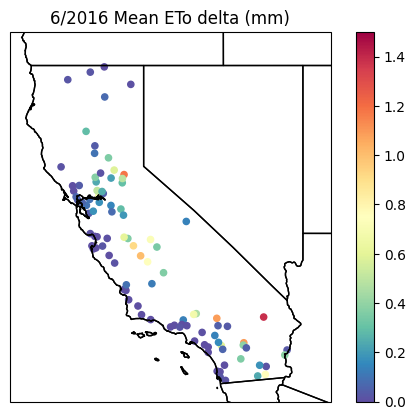

(105, 59)


<Figure size 640x480 with 0 Axes>

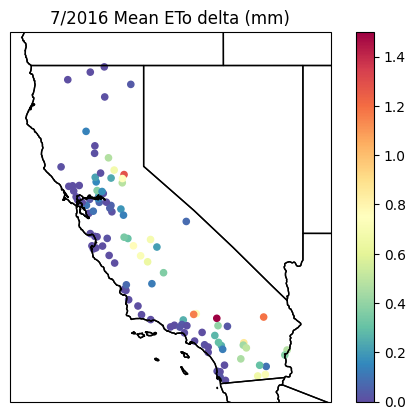

(106, 59)


<Figure size 640x480 with 0 Axes>

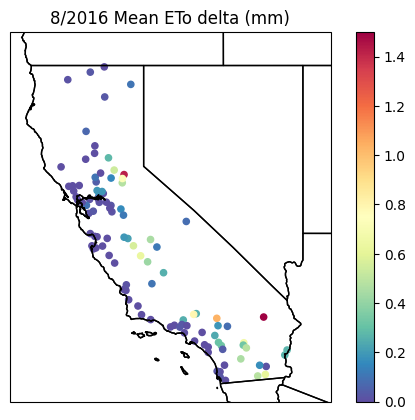

(107, 59)


<Figure size 640x480 with 0 Axes>

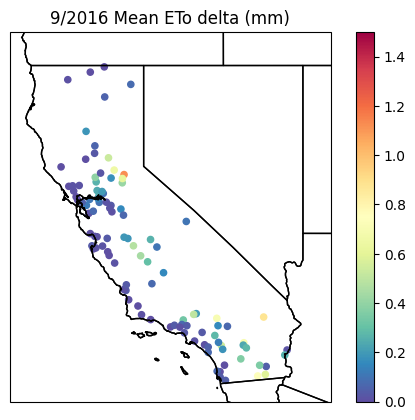

<Figure size 640x480 with 0 Axes>

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point

save_dir = '/content/CIMIS/figures/monthly_avg_dETo/'

def map_monthly_average(df, col, month, year, savefig=False):
  df['Date']=pd.to_datetime(df['Date'], format='mixed')
  df_monthly = df[(df['Date'].dt.month == month) & (df['Date'].dt.year == year)]
  print(df_monthly.shape)
  geometry = [Point(xy) for xy in zip(df_monthly['Long'], df_monthly['Lat'])]
  # Create a GeoDataFrame from the DataFrame and the list of Points
  geo_df = gpd.GeoDataFrame(df_monthly, geometry=geometry)
  # Set the coordinate reference system (CRS) for the GeoDataFrame
  geo_df.set_crs(epsg=4326, inplace=True)
  fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
  ax.set_extent([-125, -113, 32, 43], crs=ccrs.PlateCarree())

  # Add coastlines and borders
  ax.coastlines(resolution='10m')
  #ax.add_feature(cfeature.BORDERS)
  ax.add_feature(cfeature.STATES.with_scale('10m'))

  #norm = mcolors.Normalize(vmin=0, vmax=3, clip=False)
  geo_df.plot(ax=ax,  markersize=20, transform=ccrs.PlateCarree(), column=col, legend=True, cmap='Spectral_r',  vmin=0,vmax=1.5)
  # Display the
  plt.title(f"{month}/{year} Mean ETo delta (mm)")
  plt.show()
  if savefig:
    plt.tight_layout()
    plt.savefig(f"{save_dir}monthly_avg_dETo_{month}_{year}.png")


#map_monthly_average(df_month_concat, 'd_ETo_avg', 6, 2024)
dir = '/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/'
file = f'{dir}all_stations_daily_corr_MASTER.csv'
df_month_concat = pd.read_csv(file)

for year in range(2016,2017):
  for month in range(6,10):
    map_monthly_average(df_month_concat, 'd_ETo_avg', month, year, savefig=True)
